## Importing Libraries

In [1]:
# importing basic libraries

# for basic operations
import numpy as np
import pandas as pd
import dabl
import pandas_profiling as profile

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# importing interactive python
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell


## Reading Dataset

In [2]:
# lets import the dataset

amazon = pd.read_csv('amazon.csv')
google = pd.read_csv('google.csv')
naukri = pd.read_csv('naukri.csv')
jobs = pd.read_csv('jobs.csv')

In [3]:
# lets check the shapes of the datasets used 

print("Shape of Amazon Data :", amazon.shape)
print("Shape of Google Data :", google.shape)
print("Shape of Naukri Data :", naukri.shape)
print("Shape of Jobs Data :", jobs.shape)

Shape of Amazon Data : (3493, 7)
Shape of Google Data : (1250, 7)
Shape of Naukri Data : (22000, 14)
Shape of Jobs Data : (66, 14)


In [4]:
# lets check the null values in the data

print("Null values in Amazon Data :", amazon.isnull().sum().sum())
print("Null values in Google Data :", google.isnull().sum().sum())
print("Null values in Naukri Data :", naukri.isnull().sum().sum())
print("Null values in Jobs Data :", jobs.isnull().sum().sum())

Null values in Amazon Data : 27
Null values in Google Data : 43
Null values in Naukri Data : 38711
Null values in Jobs Data : 0


## Analyzing the Job Market

In [5]:
# lets check the head of the jobs data
jobs.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [62]:
# Lets check the profile of the dataset
profile.ProfileReport(jobs)

In [65]:
jobs['JobFamilyDescription'].fillna(jobs['JobFamilyDescription'].mode()[0], inplace = True)

Target looks like regression


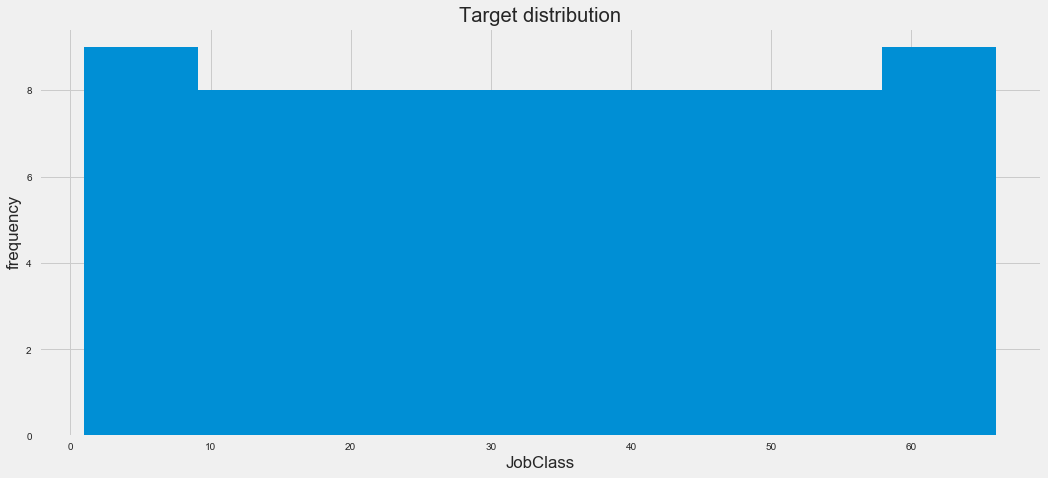

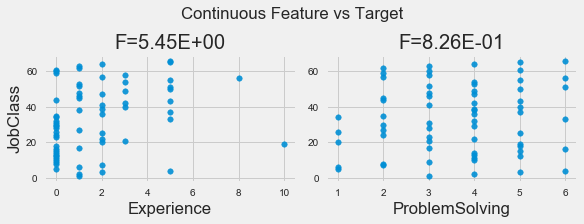

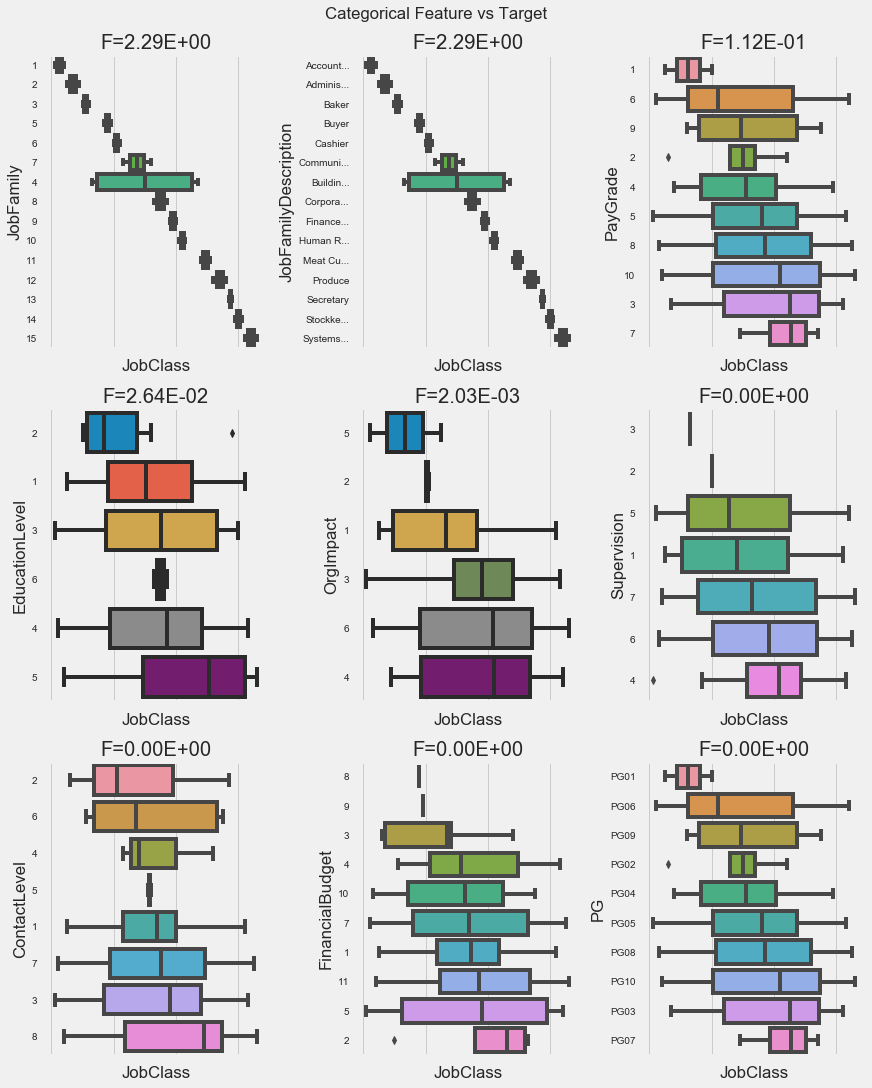

In [69]:
import warnings
warnings.filterwarnings('ignore')
dabl.plot(jobs, target_col = "JobClass")

In [6]:
# lets check the information of the data
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
ID                      66 non-null int64
JobFamily               66 non-null int64
JobFamilyDescription    66 non-null object
JobClass                66 non-null int64
JobClassDescription     66 non-null object
PayGrade                66 non-null int64
EducationLevel          66 non-null int64
Experience              66 non-null int64
OrgImpact               66 non-null int64
ProblemSolving          66 non-null int64
Supervision             66 non-null int64
ContactLevel            66 non-null int64
FinancialBudget         66 non-null int64
PG                      66 non-null object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB


In [7]:
# lets check the basic statistics about the data
x = jobs.describe()
x.style.bar()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66,66,66,66,66,66,66,66,66,66,66
mean,33.5,7.60606,33.5,5.69697,3.16667,1.75758,3.34848,3.60606,3.86364,4.75758,5.30303
std,19.1964,4.20944,19.1964,2.51744,1.52501,2.13441,1.76716,1.41289,2.10411,2.46864,3.5256
min,1,1,1,1,1,0,1,1,1,1,1
25%,17.25,4,17.25,4,2,0,2,3,1,3,2
50%,33.5,7,33.5,5,4,1,3,4,4,6,5
75%,49.75,11,49.75,8,4,2.75,4,5,5.75,7,7.75
max,66,15,66,10,6,10,6,6,7,8,11


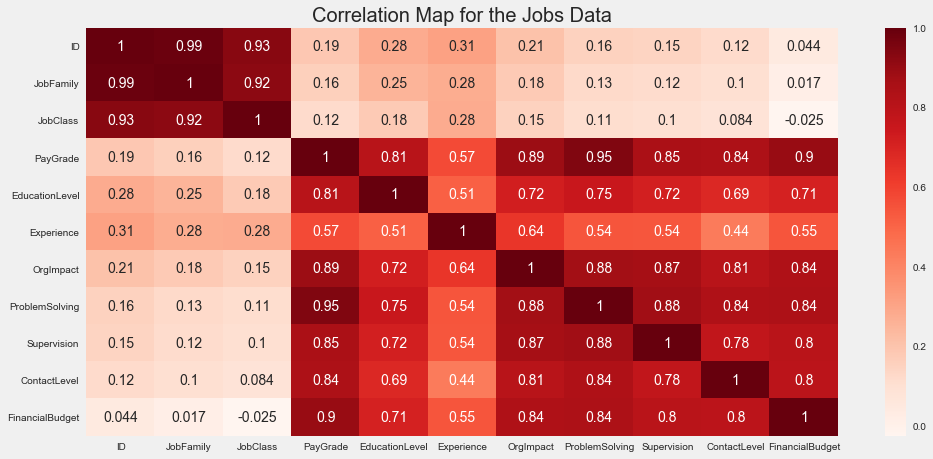

In [8]:
# lets check the correlation map

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.heatmap(jobs.corr(),
            cmap = 'Reds',
            annot = True)
plt.title('Correlation Map for the Jobs Data', fontsize = 20)
plt.show()

In [9]:
# lets check the columns in the jobs
jobs.columns

Index(['ID', 'JobFamily', 'JobFamilyDescription', 'JobClass',
       'JobClassDescription', 'PayGrade', 'EducationLevel', 'Experience',
       'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel',
       'FinancialBudget', 'PG'],
      dtype='object')

In [10]:
# lets check the no. of unique job families
jobs['JobFamily'].nunique()

15

In [11]:
# lets check the jobs in Systems Analyst
def check(x):
    return jobs.loc[jobs['JobFamilyDescription'] == x]

In [12]:
check('Systems Analyst')

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
61,62,15,Systems Analyst,62,Systems Analyst I,3,1,1,1,2,1,1,1,PG03
62,63,15,Systems Analyst,63,Systems Analyst II,5,4,1,3,3,4,3,4,PG05
63,64,15,Systems Analyst,64,Systems Analyst III,6,5,2,4,4,5,7,5,PG06
64,65,15,Systems Analyst,65,Systems Analyst IV,8,5,5,6,5,6,7,7,PG08
65,66,15,Systems Analyst,66,Systems Analyst V,10,5,5,6,6,7,8,11,PG10


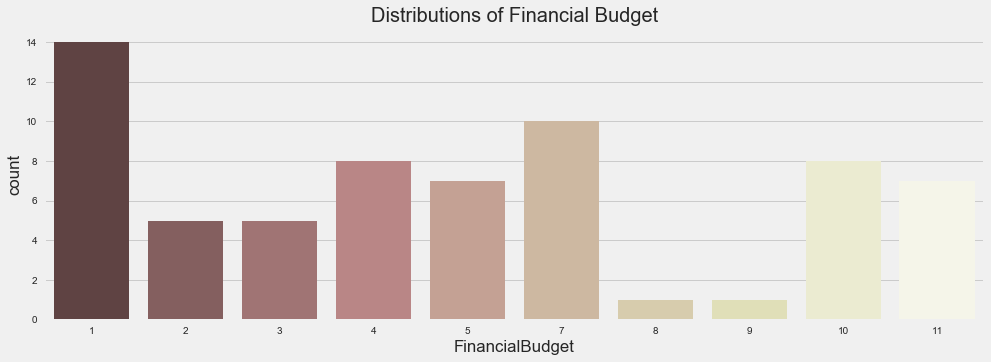

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['FinancialBudget'], palette = 'pink')
plt.title('Distributions of Financial Budget', fontsize = 20)
plt.show()

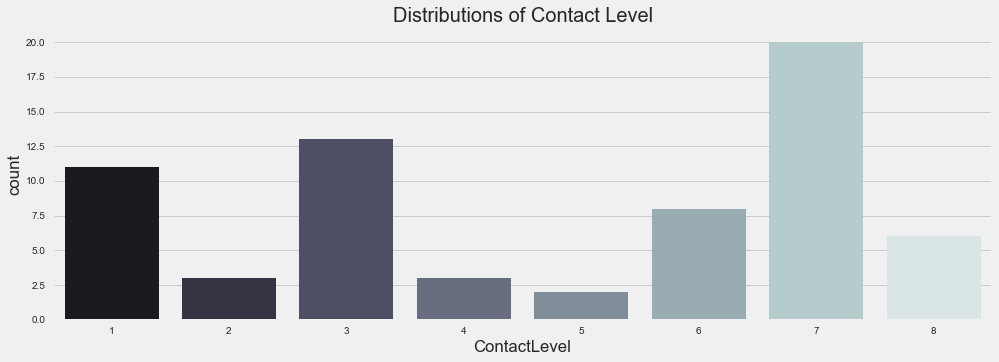

In [14]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['ContactLevel'], palette = 'bone')
plt.title('Distributions of Contact Level', fontsize = 20)
plt.show()

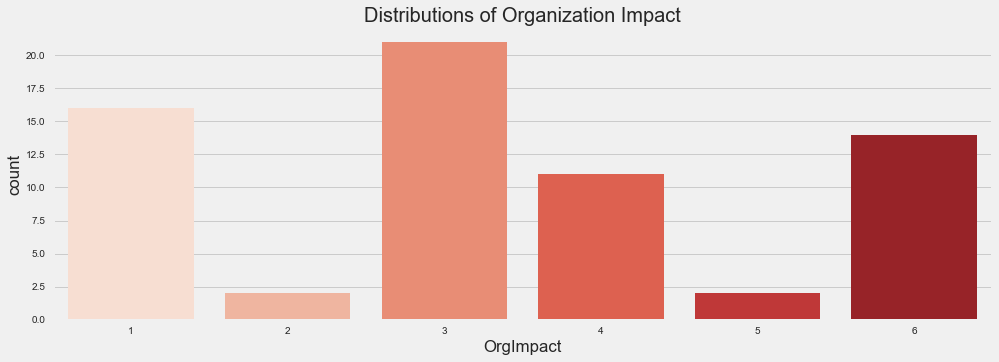

In [15]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['OrgImpact'], palette = 'Reds')
plt.title('Distributions of Organization Impact', fontsize = 20)
plt.show()

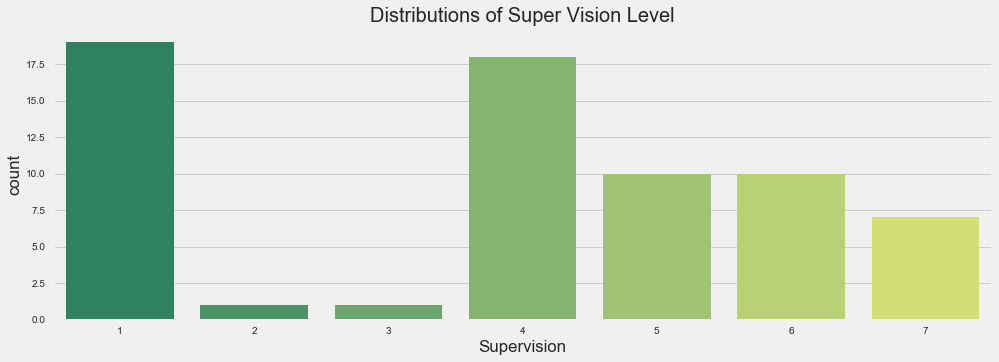

In [16]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['Supervision'], palette = 'summer')
plt.title('Distributions of Super Vision Level', fontsize = 20)
plt.show()

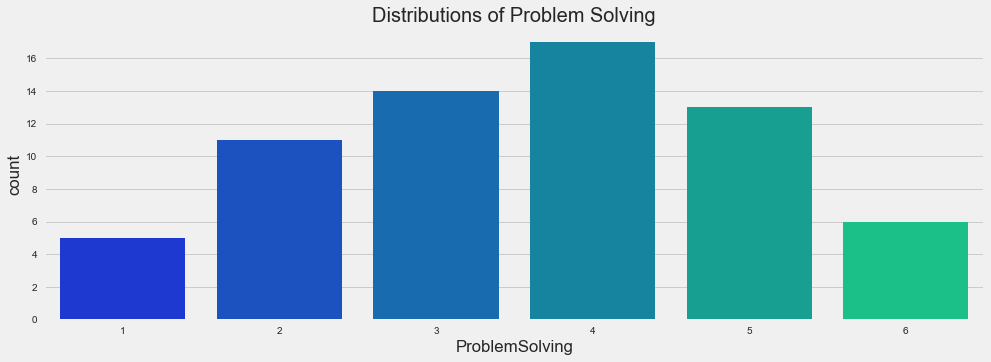

In [17]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['ProblemSolving'], palette = 'winter')
plt.title('Distributions of Problem Solving', fontsize = 20)
plt.show()

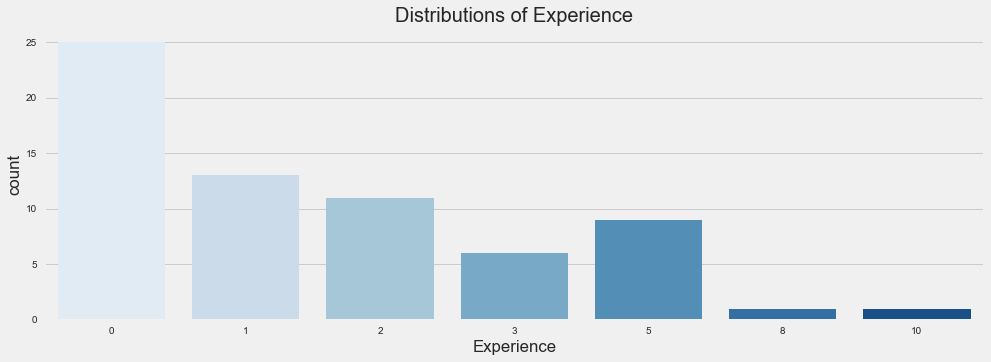

In [18]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['Experience'], palette = 'Blues')
plt.title('Distributions of Experience', fontsize = 20)
plt.show()

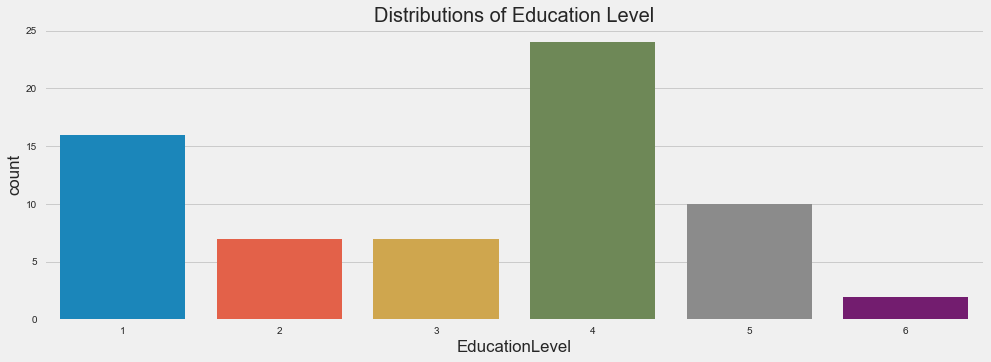

In [19]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['EducationLevel'])
plt.title('Distributions of Education Level', fontsize = 20)
plt.show()

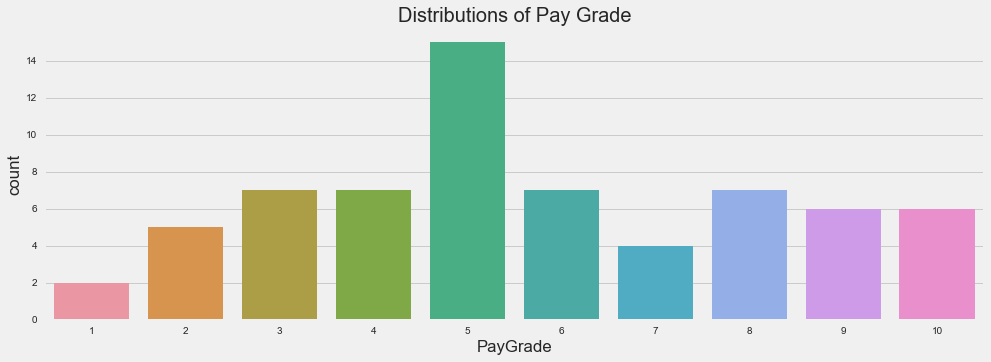

In [20]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['PayGrade'])
plt.title('Distributions of Pay Grade', fontsize = 20)
plt.show()

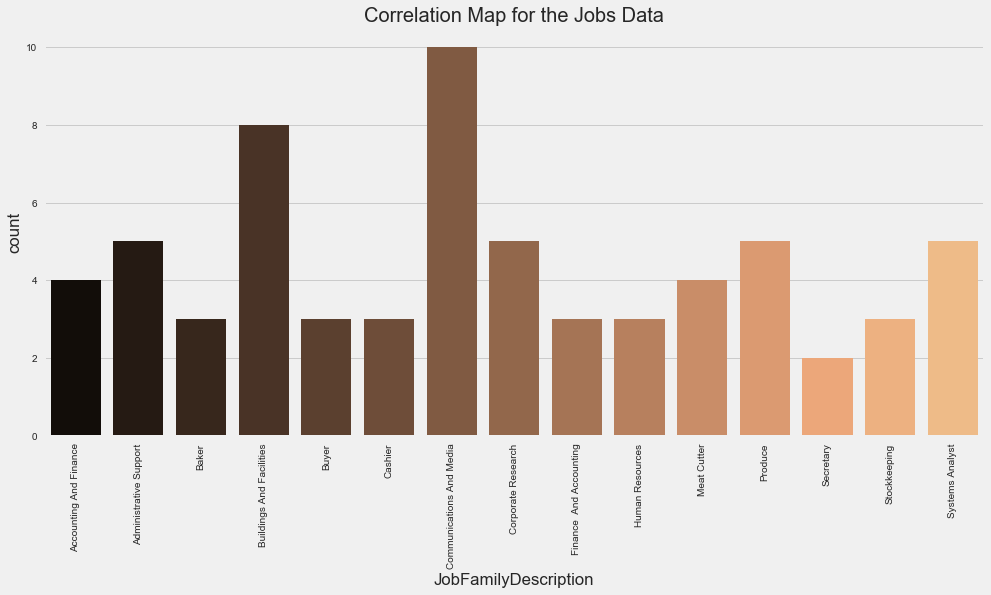

In [21]:
# lets do some data visualizations

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.countplot(jobs['JobFamilyDescription'],
              palette = 'copper')
plt.xticks(rotation = 90)
plt.title('Correlation Map for the Jobs Data', 
          fontsize = 20)
plt.show()

In [22]:
# lets group the data wrt jobs family

x = jobs.groupby(['JobFamilyDescription']).agg('mean')
x = x.drop(['ID','JobFamily','JobClass'], axis = 1)
x.style.bar(color = 'silver', align = 'mid')

,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
JobFamilyDescription,,,,,,,,
Accounting And Finance,7.25,4,2.25,5,4.5,5.5,6.25,8.25
Administrative Support,3,2.2,0.6,1.6,1.8,1.8,3.2,3.8
Baker,6.33333,2,0,2.66667,4.33333,2.33333,4.33333,5.33333
Buildings And Facilities,5.5,2.375,0.5,3,3.75,4.125,5,5
Buyer,7.33333,3.33333,3.66667,5,4.33333,5.33333,5.66667,7.33333
Cashier,3.33333,2.66667,2.33333,2.66667,2.66667,3.66667,3.33333,3
Communications And Media,4.5,2.5,0.3,2,2.9,2.8,4,3.8
Corporate Research,5.8,4,2.4,3.4,3.6,3.8,3.4,5.2
Finance And Accounting,6.66667,4,2,4,4.33333,5,5.33333,7.33333


In [23]:
x.index

Index(['Accounting And Finance', 'Administrative Support', 'Baker',
       'Buildings And Facilities', 'Buyer', 'Cashier',
       'Communications And Media', 'Corporate Research',
       'Finance  And Accounting', 'Human Resources', 'Meat Cutter', 'Produce',
       'Secretary', 'Stockkeeping', 'Systems Analyst'],
      dtype='object', name='JobFamilyDescription')

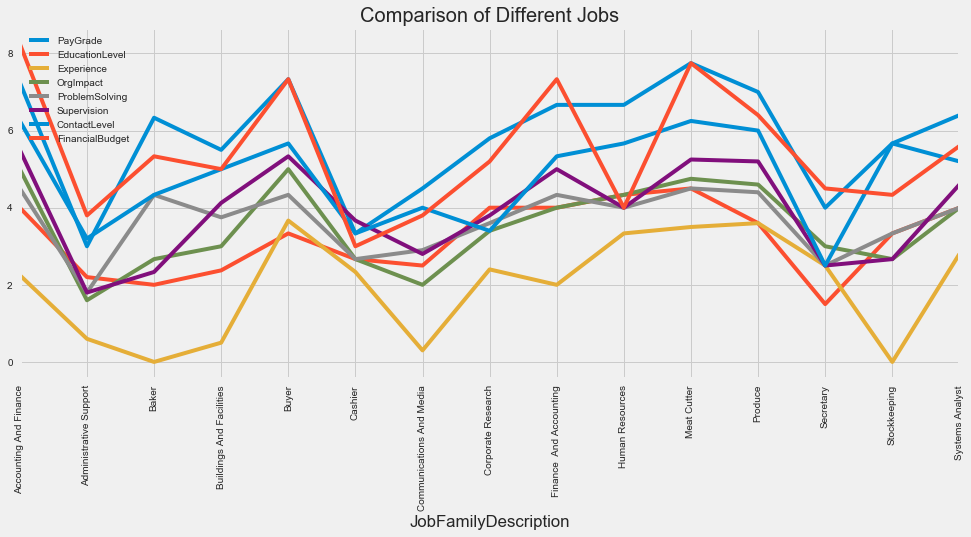

In [24]:
# lets compare all attributes at once
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

x.plot()
plt.xticks(np.arange(15), ('Accounting And Finance', 'Administrative Support', 'Baker',
       'Buildings And Facilities', 'Buyer', 'Cashier',
       'Communications And Media', 'Corporate Research',
       'Finance  And Accounting', 'Human Resources', 'Meat Cutter', 'Produce',
       'Secretary', 'Stockkeeping', 'Systems Analyst'),
        rotation = 90)
plt.title('Comparison of Different Jobs', fontsize = 20)
plt.show()

In [25]:
# lets make an Interactive visualization

@interact_manual
def check(column = 'JobFamilyDescription',
          column1 = jobs.select_dtypes('number').columns[3:],):
    sns.lineplot(jobs[column], jobs[column1])
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Text(value='JobFamilyDescription', description='column'), Dropdown(description='column1'…

In [26]:
# lets make an Interactive visualization

@interact_manual
def check(column = jobs.select_dtypes('number').columns[3:],
          column1 = jobs.select_dtypes('number').columns[4:],):
    sns.boxplot(jobs[column], jobs[column1])
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='column', options=('PayGrade', 'EducationLevel', 'Experience', 'Org…

In [27]:
# lets make an Interactive visualization

@interact_manual
def check(x_axis = jobs.select_dtypes('number').columns[3:],
          y_axis = jobs.select_dtypes('number').columns[4:]):
    sns.violinplot(jobs[x_axis],
                    jobs[y_axis],
                    color = 'black')
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='x_axis', options=('PayGrade', 'EducationLevel', 'Experience', 'Org…

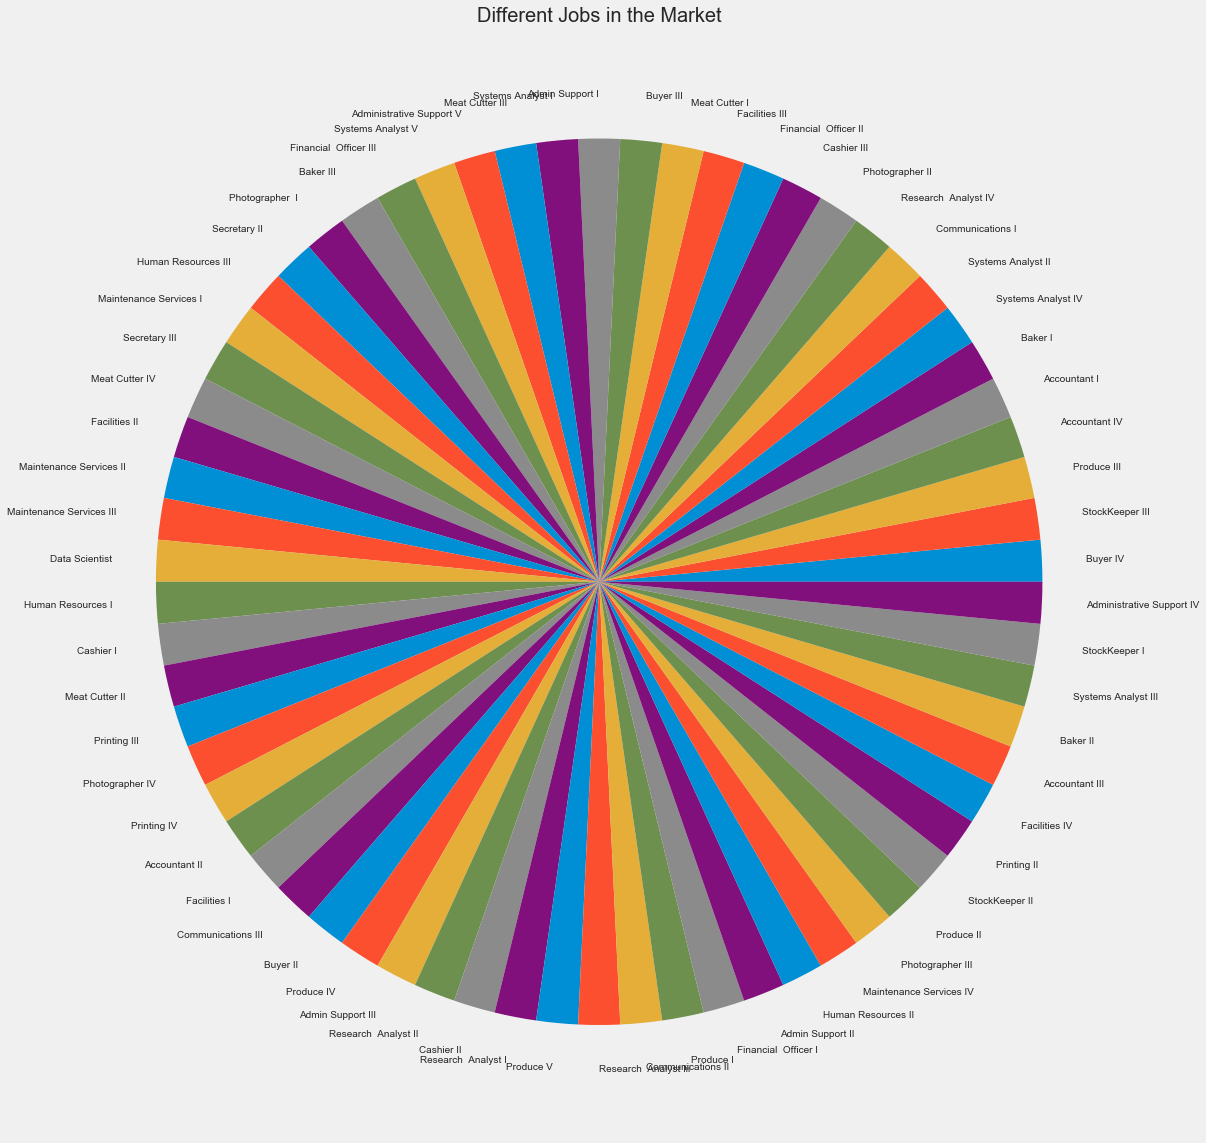

In [28]:
# lets do some data visualizations

plt.rcParams['figure.figsize'] = (19, 19)
plt.style.use('fivethirtyeight')

jobs['JobClassDescription'].value_counts().plot(kind = 'pie')
plt.xticks(rotation = 90)
plt.axis('off')
plt.title('Different Jobs in the Market', 
          fontsize = 20)
plt.show()

## Analyzing Jobs in Google

In [29]:
# lets check the head of the google
google.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [30]:
# shape of google 
google.shape

(1250, 7)

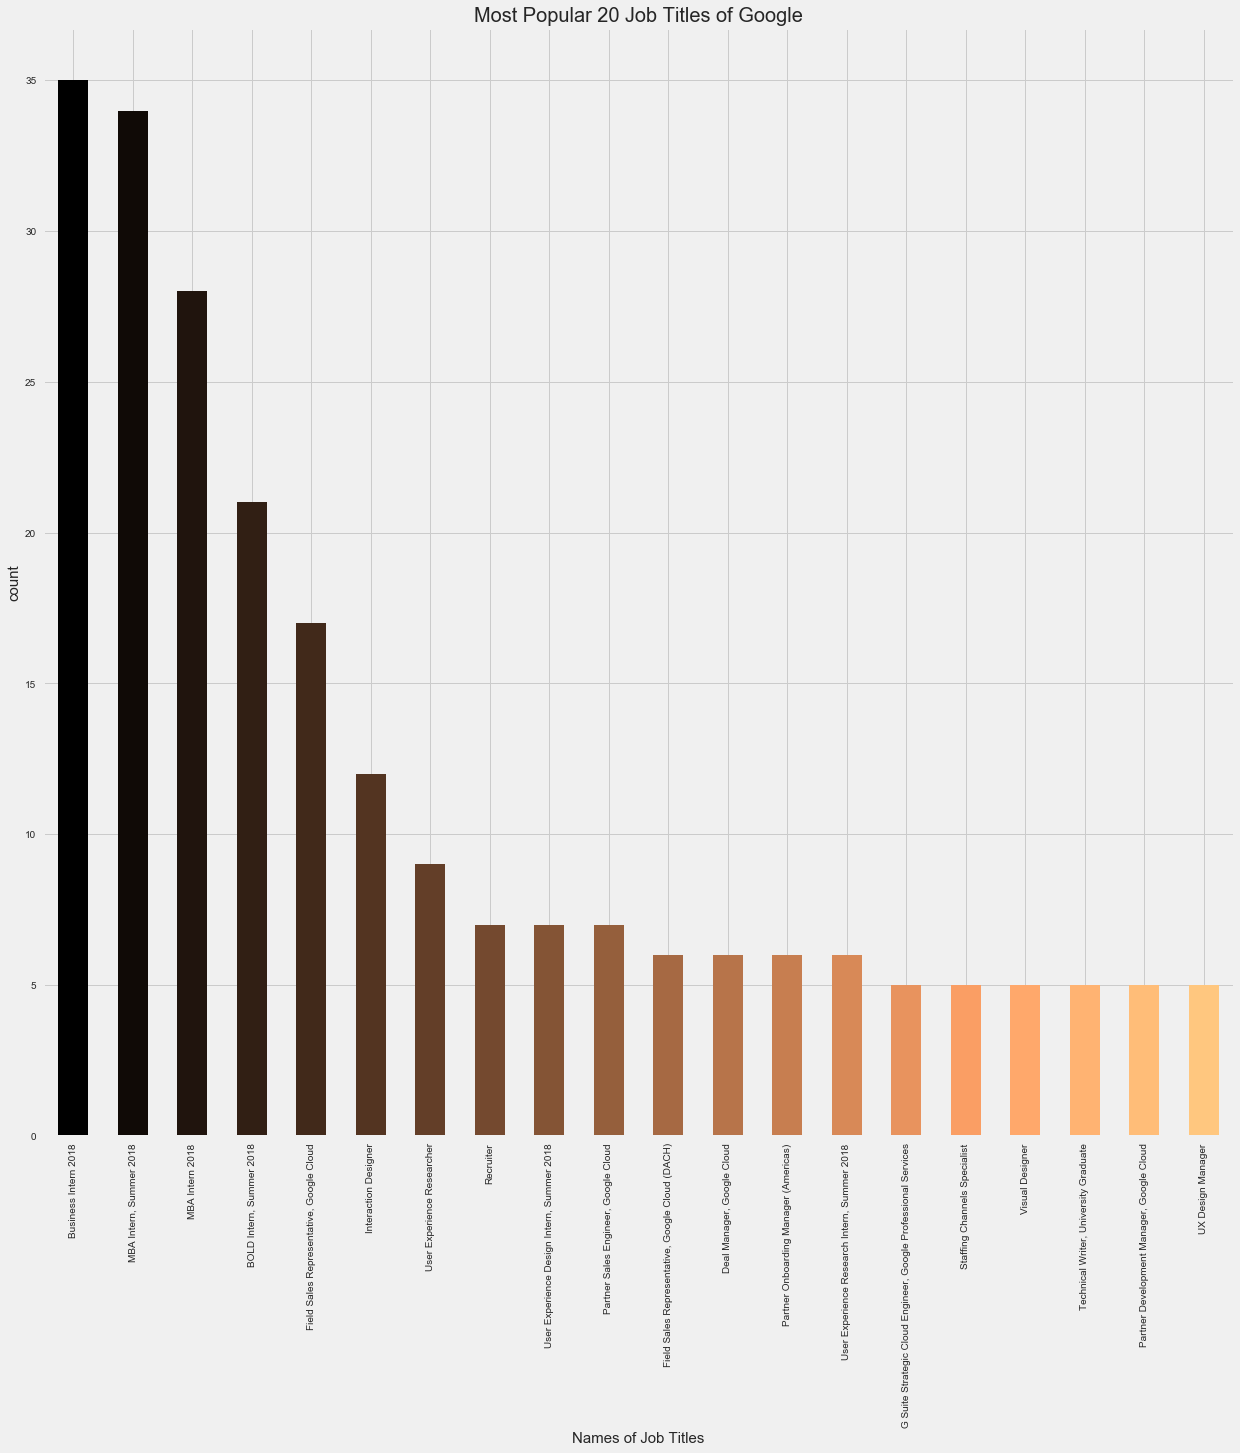

In [31]:
# most popular jobs at google

color = plt.cm.copper(np.linspace(0, 1, 20))
google['Title'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Job Titles of Google", fontsize = 20)
plt.xlabel('Names of Job Titles', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

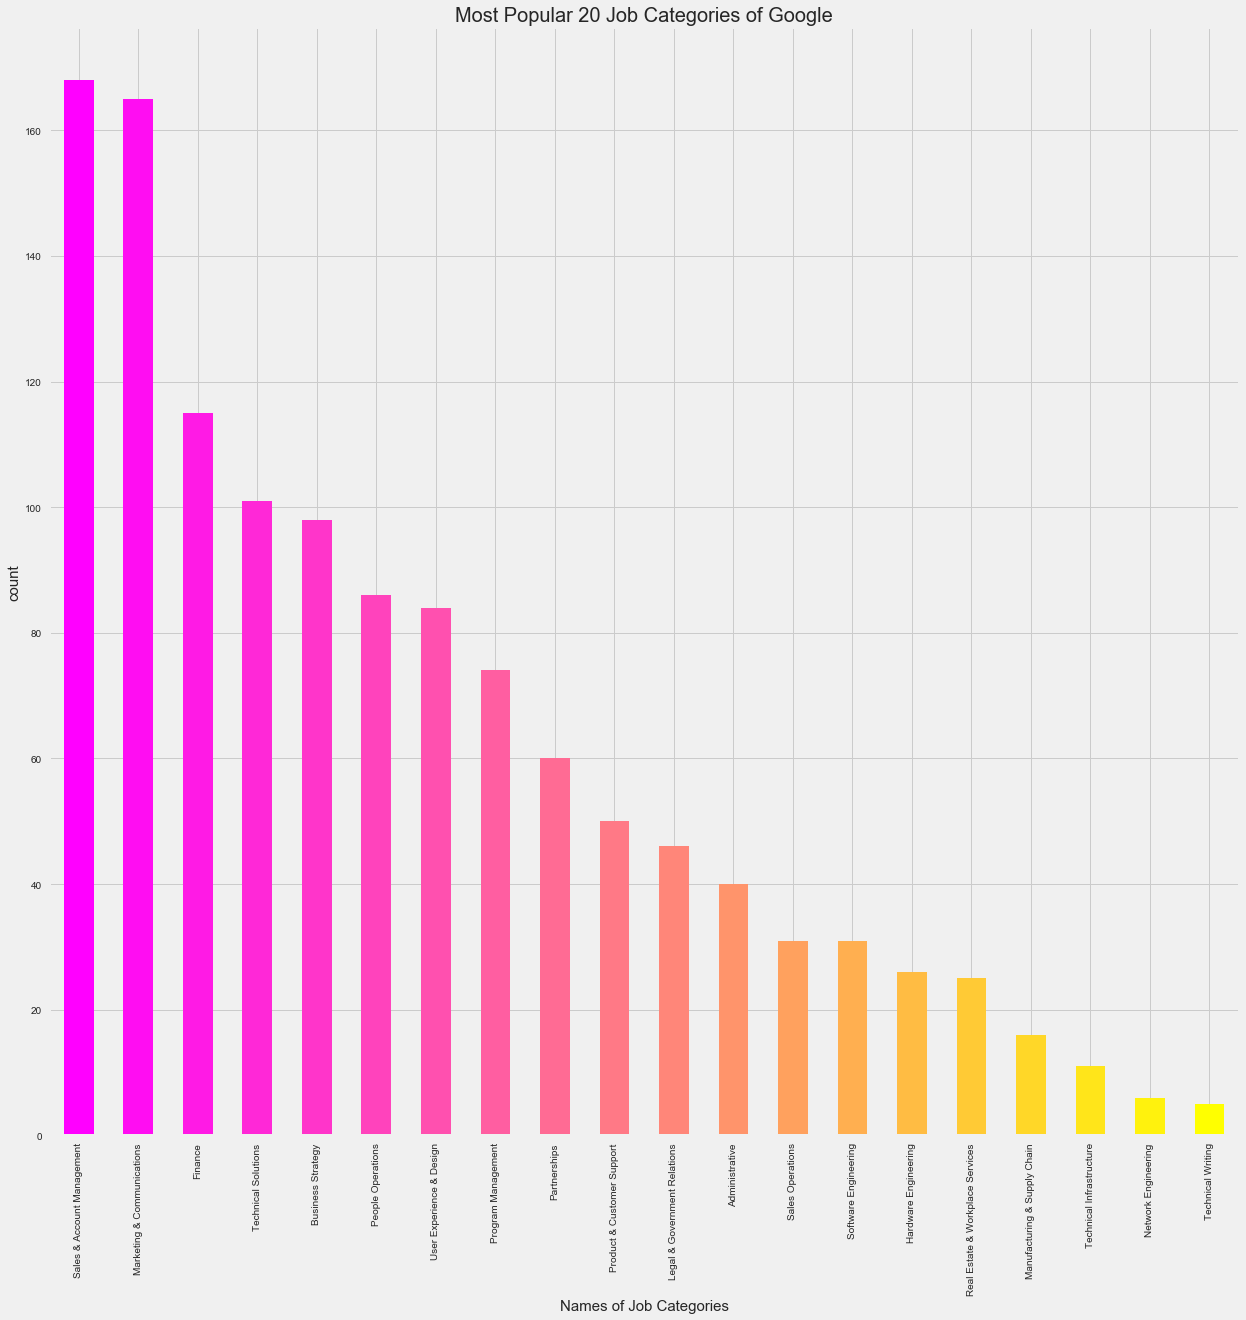

In [32]:
# most popular job categories

color = plt.cm.spring(np.linspace(0, 1, 20))
google['Category'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Job Categories of Google", fontsize = 20)
plt.xlabel('Names of Job Categories', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

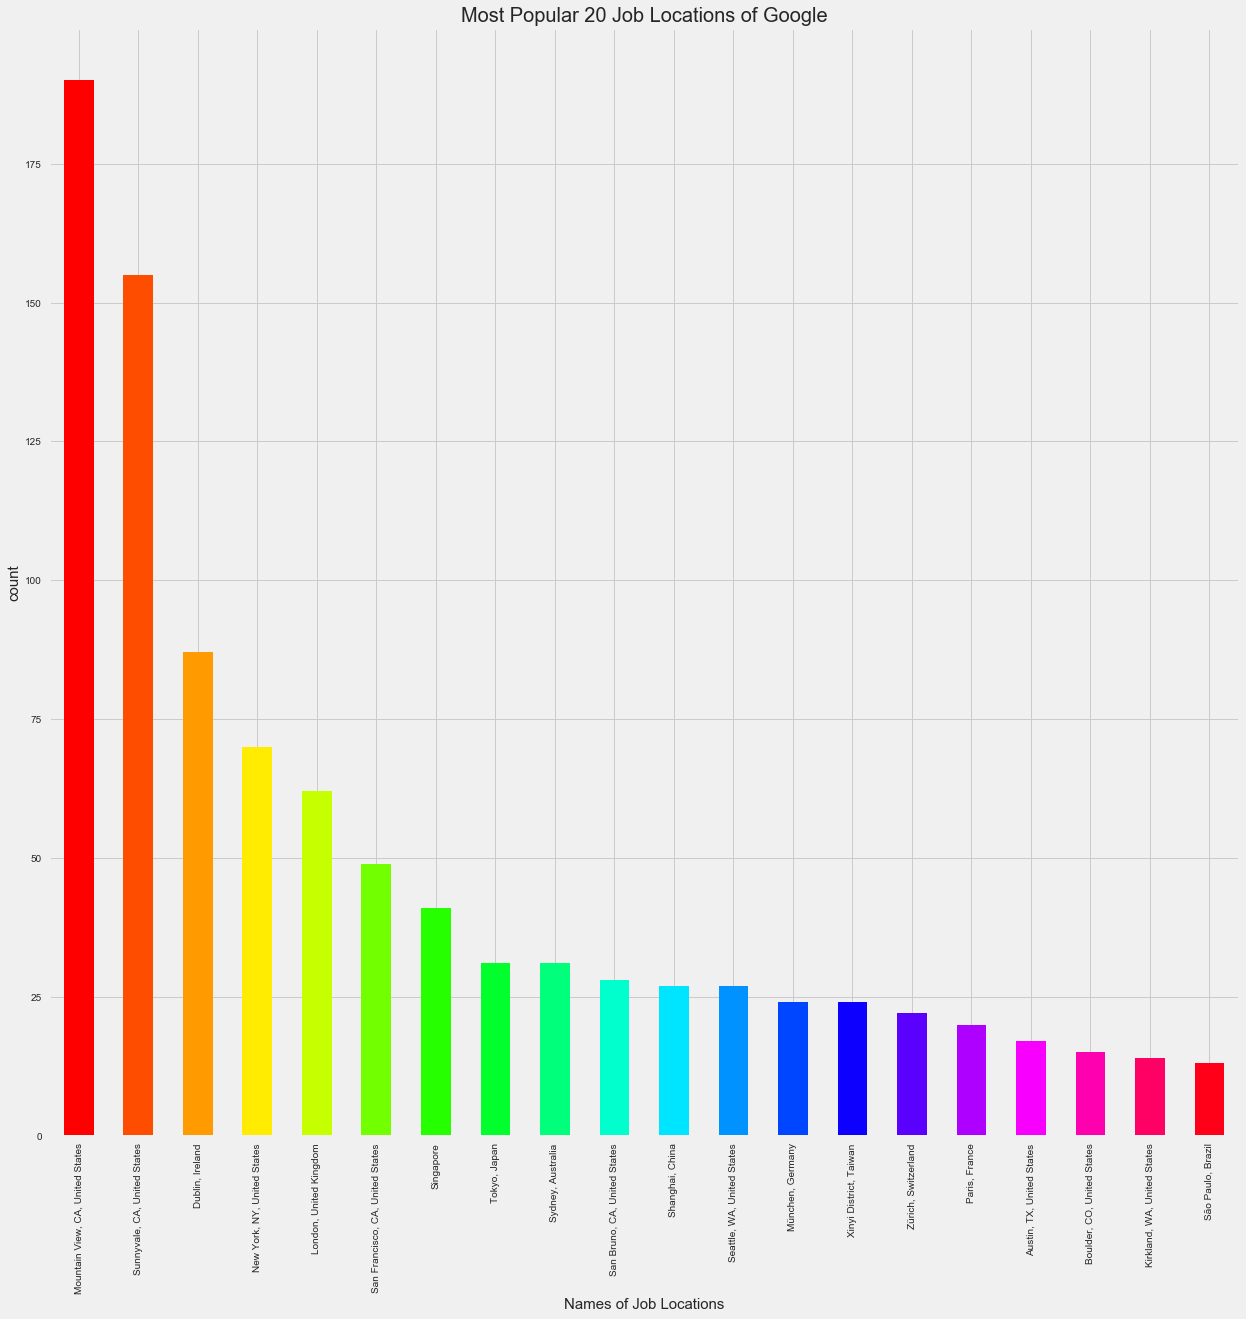

In [33]:
# most popular job locations for google

color = plt.cm.hsv(np.linspace(0, 1, 20))
google['Location'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Job Locations of Google", fontsize = 20)
plt.xlabel('Names of Job Locations', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

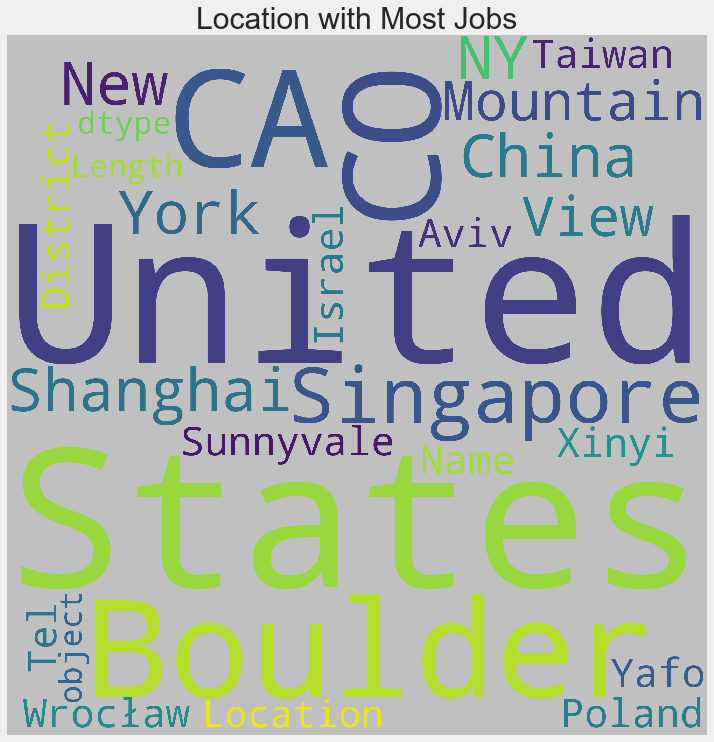

In [34]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'silver',
                      width = 2000,
                      height = 2000).generate(str(google['Location']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Location with Most Jobs', fontsize = 30)
plt.show()


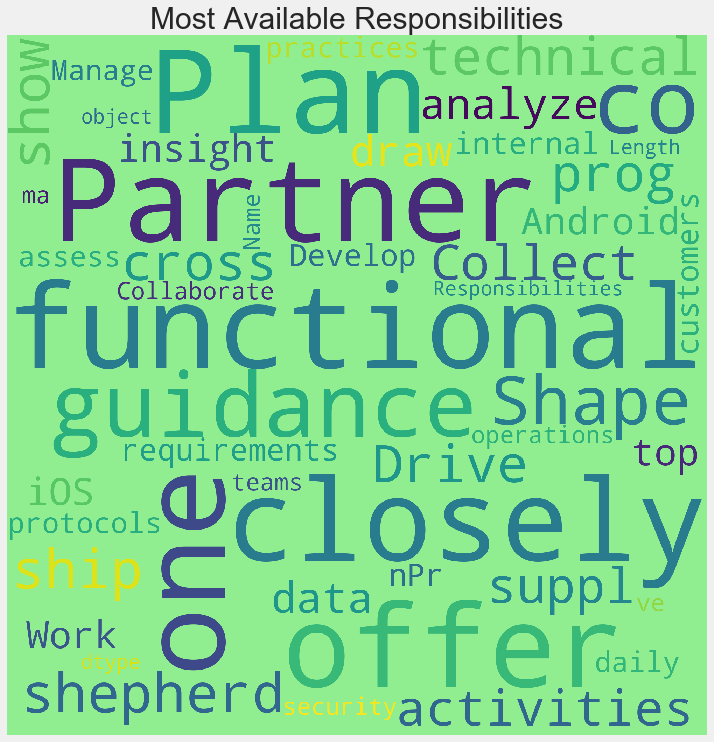

In [35]:
# checking the most popular Responsibilities

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen',
                      max_words = 100,
                      width = 2000,
                      height = 2000).generate(str(google['Responsibilities']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Available Responsibilities', fontsize = 30)
plt.show()

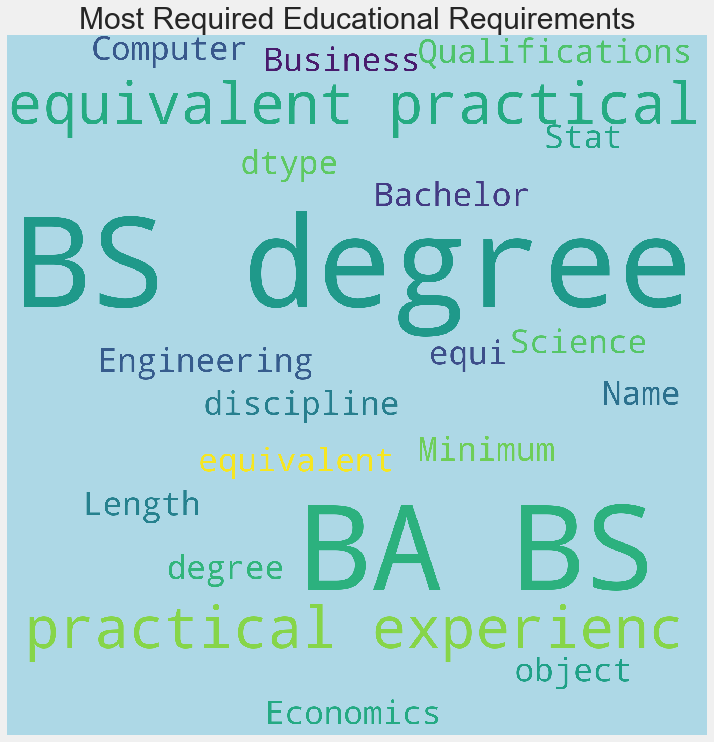

In [36]:
# checking the most popular Minimum edu. requirements

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 80,
                      width = 2000,
                      height = 2000).generate(str(google['Minimum Qualifications']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Required Educational Requirements', fontsize = 30)
plt.show()

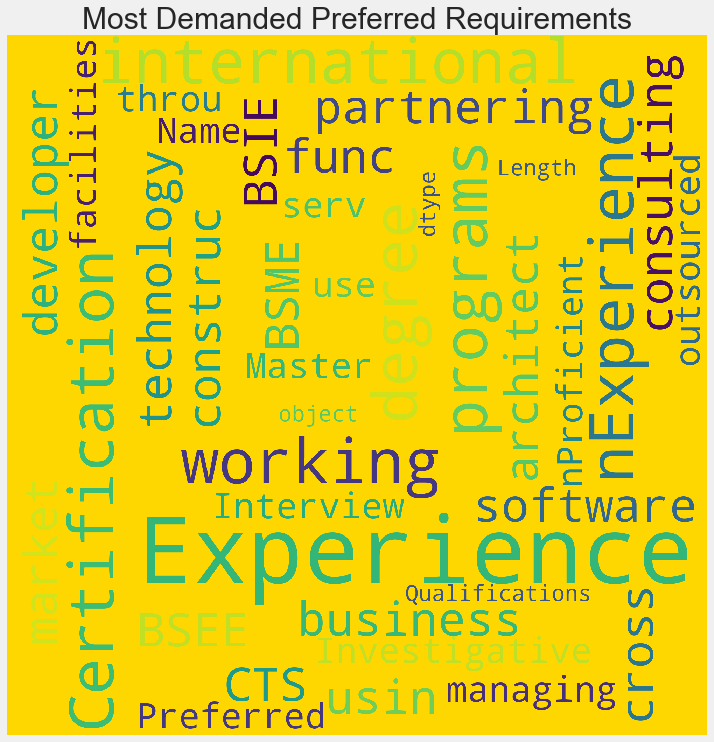

In [37]:
# checking the most popular Minimum edu. requirements

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gold',
                      max_words = 80,
                      width = 2000,
                      height = 2000).generate(str(google['Preferred Qualifications']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Demanded Preferred Requirements', fontsize = 30)
plt.show()

## Analyzing Jobs in Amazon

In [38]:
# lets check the head of the amazon dataset
amazon.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [39]:
# shape of amazon
amazon.shape

(3493, 7)

In [40]:
# lets check the columns inside the dataset
amazon.columns

Index(['Unnamed: 0', 'Title', 'location', 'Posting_date', 'DESCRIPTION',
       'BASIC QUALIFICATIONS', 'PREFERRED QUALIFICATIONS'],
      dtype='object')

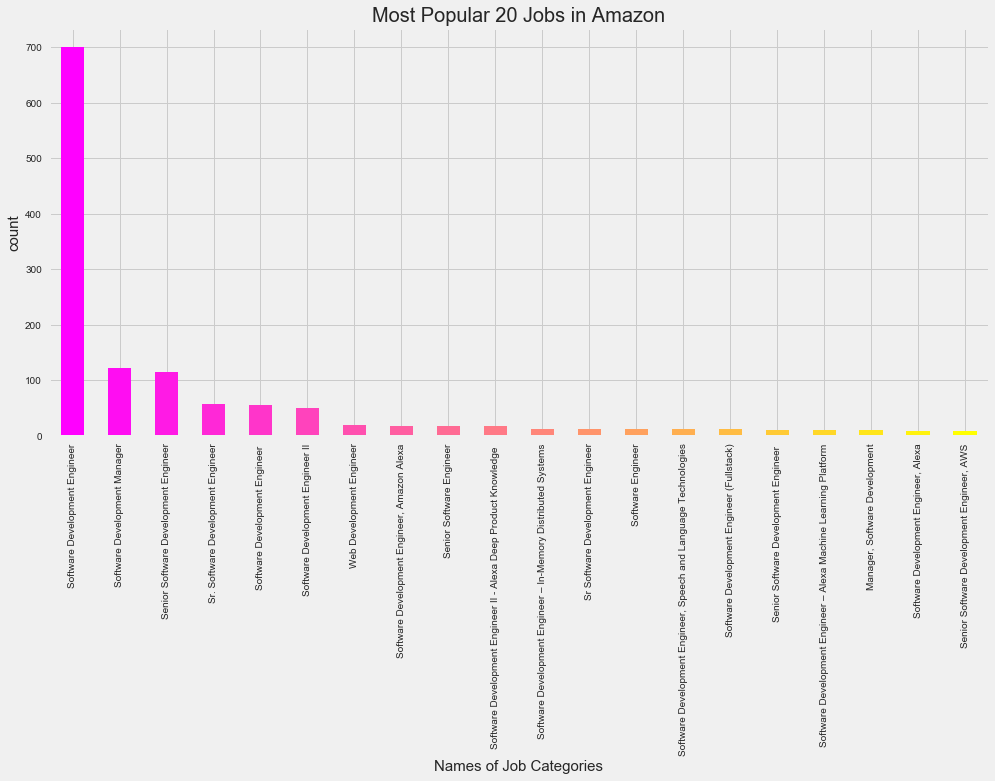

In [41]:
# most popular job categories

plt.rcParams['figure.figsize'] = (15, 7)
color = plt.cm.spring(np.linspace(0, 1, 20))
amazon['Title'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Jobs in Amazon", fontsize = 20)
plt.xlabel('Names of Job Categories', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

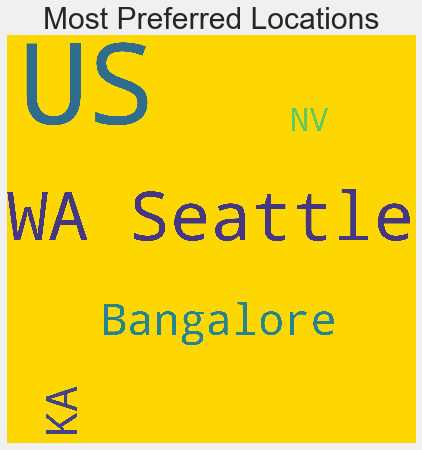

In [42]:
# checking the most popular locations for Amazon

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gold',
                      max_words = 5,
                      width = 2000,
                      height = 2000).generate(str(amazon['location']))

plt.rcParams['figure.figsize'] = (12, 7)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Preferred Locations', fontsize = 30)
plt.show()

In [43]:
# lets check the job description

import spacy
nlp = spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = amazon['DESCRIPTION'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

In [44]:
for i in range(15, 50):
    one_sentence = amazon['BASIC QUALIFICATIONS'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

In [45]:
for i in range(15, 50):
    one_sentence = amazon['PREFERRED QUALIFICATIONS'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



c:\users\roshan\appdata\local\programs\python\python36\lib\runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



## Analyzing Jobs available in Naukri.com

In [46]:
# lets check the head of naukri
pd.set_option('max_columns', 15)
naukri.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [47]:
# shape of naukri
naukri.shape

(22000, 14)

In [48]:
# info of the data
naukri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
company                21996 non-null object
education              20004 non-null object
experience             21996 non-null object
industry               21995 non-null object
jobdescription         21996 non-null object
jobid                  22000 non-null int64
joblocation_address    21499 non-null object
jobtitle               22000 non-null object
numberofpositions      4464 non-null float64
payrate                21903 non-null object
postdate               21977 non-null object
site_name              3987 non-null object
skills                 21472 non-null object
uniq_id                22000 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 2.3+ MB


In [49]:
# data types of the data
naukri.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
dtype: object

In [50]:
# lets check the description of the data
naukri['numberofpositions'].describe()

count    4464.000000
mean       45.116935
std       186.197193
min         1.000000
25%         2.000000
50%         4.000000
75%        10.000000
max      2000.000000
Name: numberofpositions, dtype: float64

In [51]:
# lets check the columns in the naukri data
naukri.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

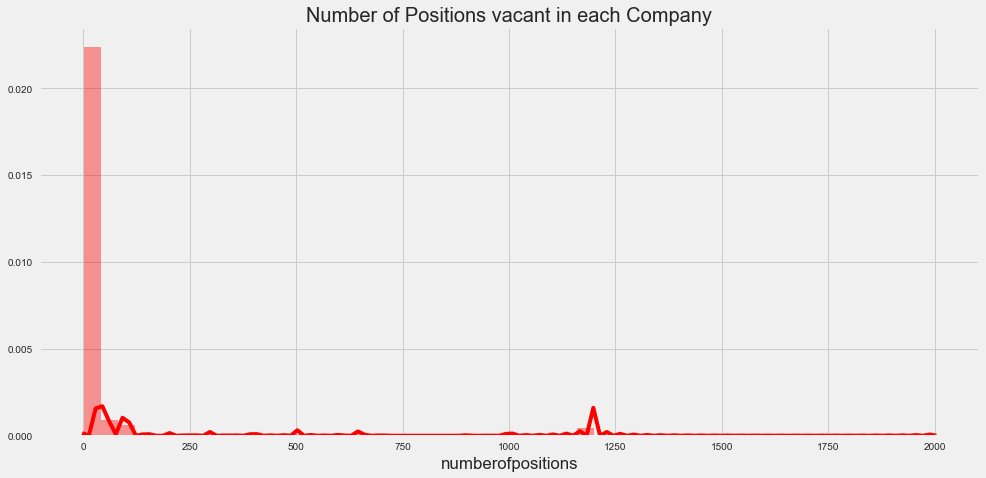

In [52]:
# lets check the number of positions

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.distplot(naukri['numberofpositions'], color = 'red')
plt.title('Number of Positions vacant in each Company', fontsize = 20)
plt.show()

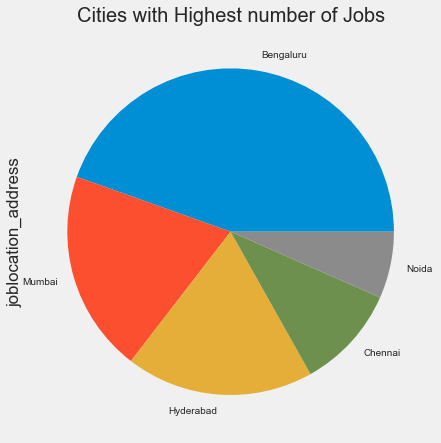

In [53]:
# lets check the industries with most jobs

# lets do some cleaning
naukri['joblocation_address'] = naukri['joblocation_address'].replace(('Bengaluru/Bangalore',
                                                                       'Hyderabad / Secunderabad'),
                                                                      ('Bengaluru','Hyderabad'))
a = naukri['joblocation_address'].value_counts()
a = a.sort_values(ascending = False)
a = a.head(5)
a = a.plot(kind = 'pie')
plt.title('Cities with Highest number of Jobs', fontsize = 20)
plt.show()

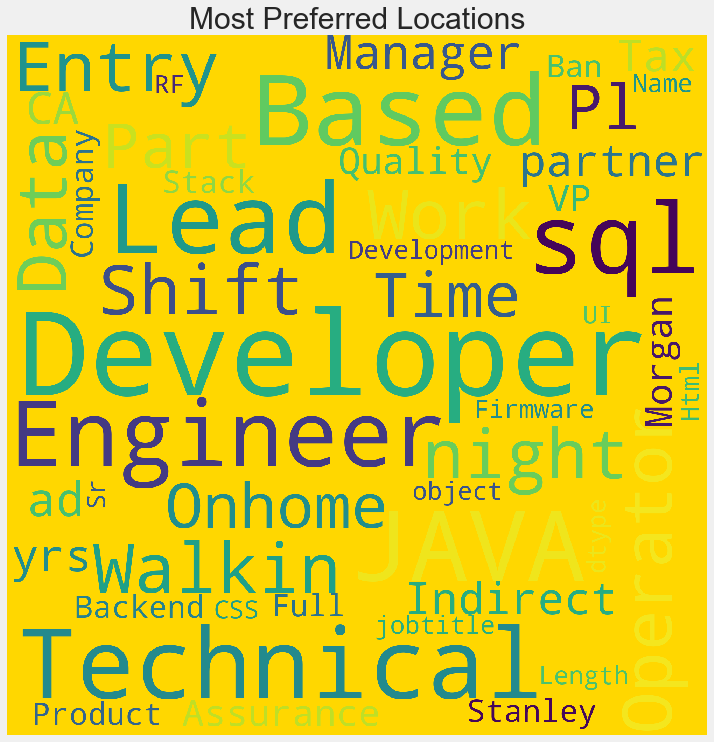

In [54]:
# checking the most popular job titles

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gold',
                      max_words = 50,
                      width = 2000,
                      height = 2000).generate(str(naukri['jobtitle']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Preferred Locations', fontsize = 30)
plt.show()

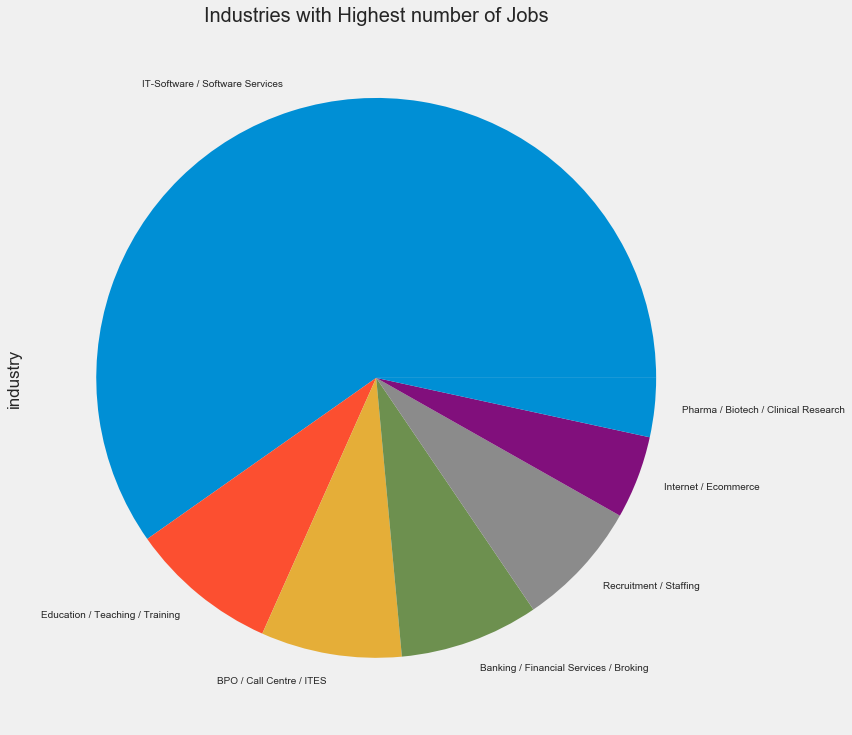

In [55]:
# lets check the industries with most jobs

a = naukri['industry'].value_counts()
a = a.sort_values(ascending = False)
a = a.head(7)
a = a.plot(kind = 'pie')
plt.title('Industries with Highest number of Jobs', fontsize = 20)
plt.show()

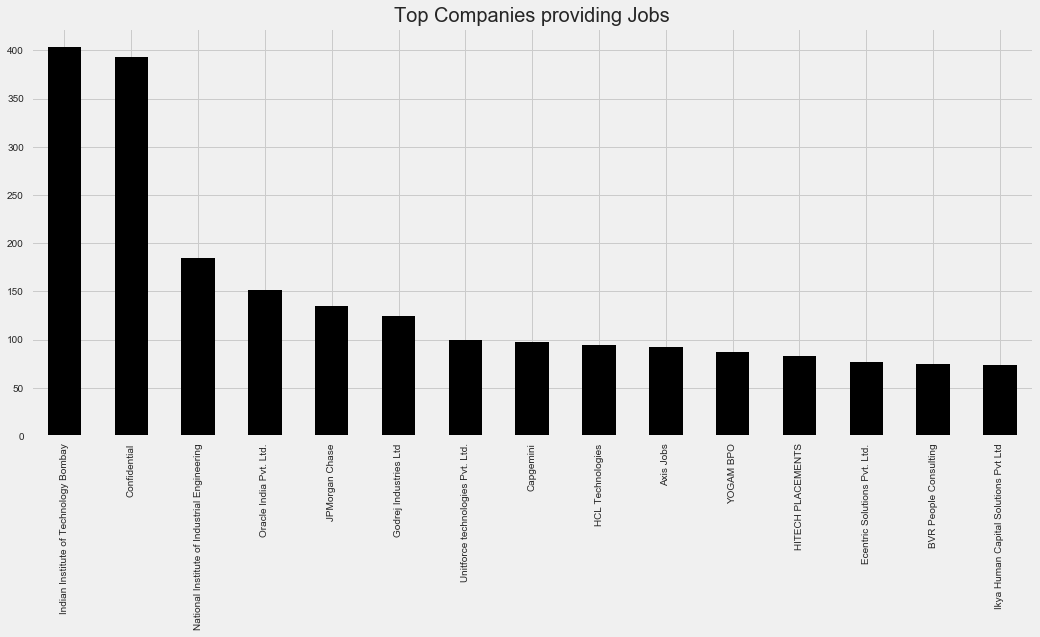

In [56]:
# lets check the top 20 companies providing jobs
plt.rcParams['figure.figsize'] = (16, 7)
naukri['company'].value_counts().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'black')
plt.title('Top Companies providing Jobs', fontsize = 20)
plt.show()

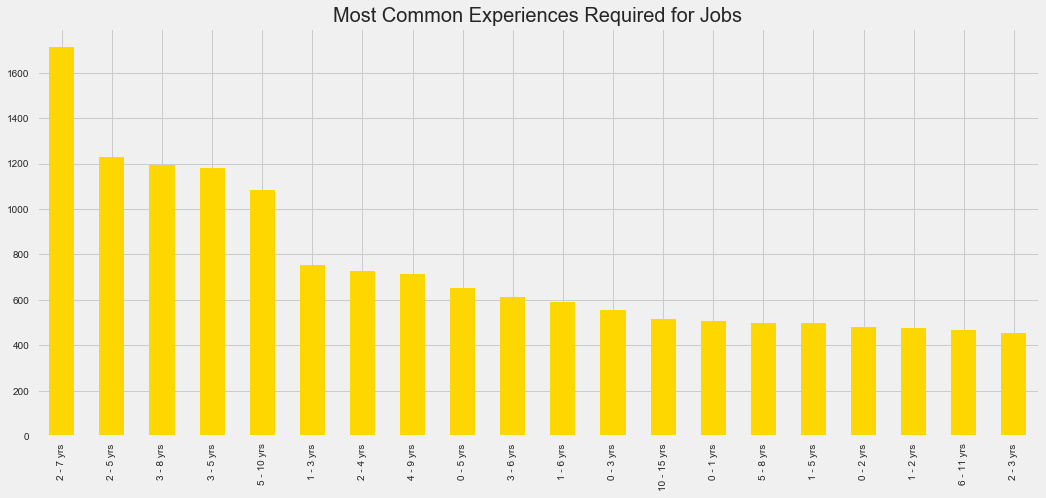

In [57]:
# lets check the most common experience required

x = naukri['experience'].value_counts()
x = x.sort_values(ascending = False)
x = x.head(20)
x = x.plot(kind = 'bar', color = 'gold')
plt.title('Most Common Experiences Required for Jobs', fontsize = 20)
plt.show()

In [58]:
for i in range(15, 50):
    one_sentence = naukri['jobdescription'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

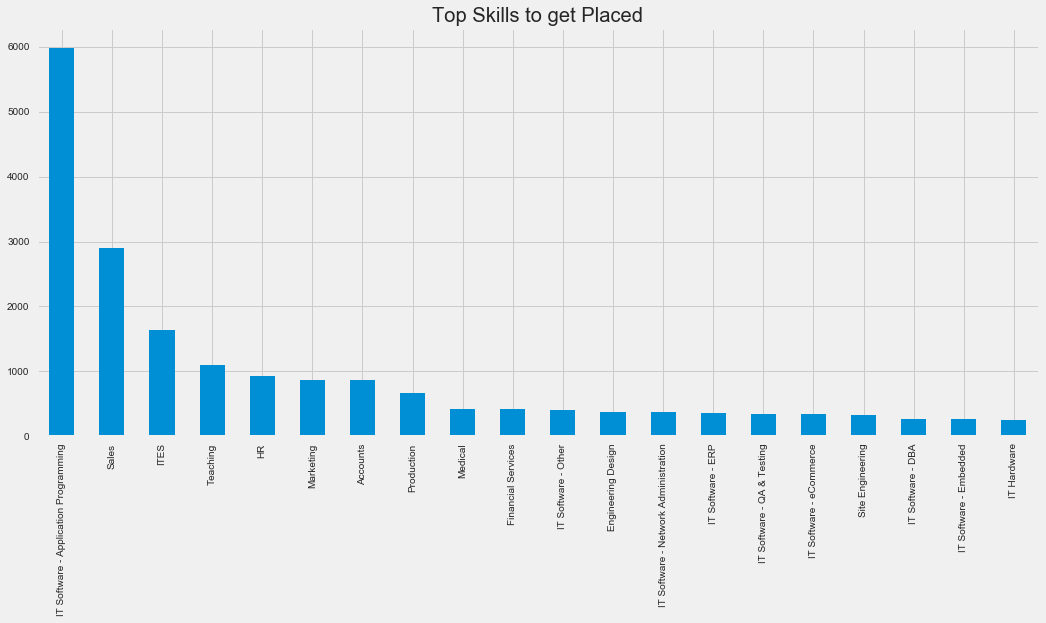

In [59]:
# top Skills to get Jobs

x = naukri['skills'].value_counts()
x = x.sort_values(ascending = False)
x = x.head(20)
x = x.plot(kind = 'bar')
plt.title('Top Skills to get Placed')
plt.show()

In [75]:
import gensim
from gensim.summarization import keywords
from gensim.summarization import summarize

In [73]:
# chekcing the top keywords used by the HRs
print(keywords(one_sentence))

customers
customer
services
service
servicing
bank
banks
banking
manage
managing
manager
management
job
jobs
sales
client
relationships
relationship
role
profiling
profile
account
accounts
generate
nri high
larger
targets
financial
generation activity
graduation
handling
active
needs
need
business


In [77]:
print(summarize(text = one_sentence))

*Deepen the relationship by Cross selling Banks Products and Services like Insurance, Mutual Funds, Investment Services account, family accounts, PIS, E-Broking, Home Loans e.t.c. according to Customer Need *Handling the service requirements of the HNW customers Regular updates on the NR business numbers, values for the Branches *To Enhance & Retain customer profitability by capturing larger share of Wallet *Ensure profitability of the portfolio: Generate high Income per Customer *Help the Branches in Promotional and Lead generation activity for NR accounts *Assist and train the Branches on NR Product and Processes Managing / servicing existing client relationships and bring in new relationships through referrals/ active solicitation.


In [80]:
naukri.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [86]:
naukri['joblocation_address'] = naukri['joblocation_address'].fillna(naukri['joblocation_address'].mode()[0])
naukri.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

In [34]:
def city(y, z):
    loc = naukri[['company',
                  'industry',
                  'jobtitle',
                  'skills',
                  'experience',
                  'payrate']]
    skl = loc.loc[loc['skills'] == y]
    exp = skl.loc[skl['experience'] == z]
    return exp

In [35]:
city('Sales', '0 - 1 yrs')

,company,industry,jobtitle,skills,experience,payrate
27,Human Capital Resource,Internet / Ecommerce,Telesales Executive,Sales,0 - 1 yrs,"50,000 - 1,50,000 P.A"
187,United Capital Club,IT-Software / Software Services,Available Part time / full time work at Top M....,Sales,0 - 1 yrs,"2,00,000 - 4,00,000 P.A"
290,Bharath Infra Exports and Imports Ltd,Construction / Engineering / Cement / Metals,Sales Executive for Tiles,Sales,0 - 1 yrs,"1,50,000 - 2,50,000 P.A. incentives"
428,United Capital Club,BPO / Call Centre / ITES,Part time Add Posting - Copy Paste Work at you...,Sales,0 - 1 yrs,"3,75,000 - 4,50,000 P.A"
996,Marks and Spencer Reliance India Pvt. Ltd.,Retail / Wholesale,Internship Walkin-marks & Spencer-- Bangalore ...,Sales,0 - 1 yrs,Not Disclosed by Recruiter
...,...,...,...,...,...,...
20742,United Capital Club,IT-Software / Software Services,"Spend 2 ,3 hour on Internet as part / full Tim...",Sales,0 - 1 yrs,"3,75,000 - 4,00,000 P.A"
20880,Saffron Global Corp,BPO / Call Centre / ITES,Manager-in-training (mit) - Freshers,Sales,0 - 1 yrs,"1,50,000 - 2,50,000 P.A"
21011,Usha Fire Safety Equipments (P) Ltd.,Pharma / Biotech / Clinical Research,Computer Operator/office Assistant,Sales,0 - 1 yrs,Not Disclosed by Recruiter
21151,Choice Solutions Limited hiring for Choice Sol...,IT-Software / Software Services,Sales Executive - Fresher,Sales,0 - 1 yrs,Not Disclosed by Recruiter


In [32]:
def check(x, y, z):
    loc = naukri[['company',
                  'industry',
                  'jobtitle',
                  'skills',
                  'experience',
                  'payrate']].loc[naukri['joblocation_address'] == x]
    skl = loc.loc[loc['skills'] == y]
    exp = skl.loc[skl['experience'] == z]
    return exp

In [24]:
naukri['skills'].value_counts()

IT Software - Application Programming      5989
Sales                                      2893
ITES                                       1640
Teaching                                   1091
HR                                          928
Marketing                                   868
Accounts                                    860
Production                                  667
Medical                                     418
Financial Services                          413
IT Software - Other                         407
Engineering Design                          382
IT Software - Network Administration        372
IT Software - ERP                           354
IT Software - QA & Testing                  342
IT Software - eCommerce                     336
Site Engineering                            322
IT Software - DBA                           273
IT Software - Embedded                      262
IT Hardware                                 253
Journalism                              

In [25]:
naukri['experience'].value_counts()

2 - 7 yrs      1712
2 - 5 yrs      1231
3 - 8 yrs      1192
3 - 5 yrs      1181
5 - 10 yrs     1084
               ... 
15 - 24 yrs       1
6 - 12 yrs        1
15 - 21 yrs       1
3 - 10 yrs        1
18 - 25 yrs       1
Name: experience, Length: 147, dtype: int64

In [33]:
check('Hyderabad', 'Marketing', '0 - 1 yrs')

,company,industry,jobtitle,skills,experience,payrate
20768,Clinnovo Research Labs Private Limited.,Media / Entertainment / Internet,Interns in mass Communication for Yohyoh.com,Marketing,0 - 1 yrs,"1,00,000 - 2,00,000 P.A"
20787,Tamada Media Private Limited,Media / Entertainment / Internet,Client Acquisition Executive,Marketing,0 - 1 yrs,Not Disclosed by Recruiter
21406,Diago Software Services Pvt.Ltd,IT-Software / Software Services,Business Development Executive,Marketing,0 - 1 yrs,Not Disclosed by Recruiter


In [29]:
check('Noida','IT Software - Embedded', '0 - 1 yrs')

,company,industry,jobtitle,skills,experience,payrate
14510,Synopsys (India) Private Limited,IT-Software / Software Services,Intern (Technical),IT Software - Embedded,0 - 1 yrs,Not Disclosed by Recruiter
14604,Synopsys (India) Private Limited,IT-Software / Software Services,Intern (Technical- Engineering),IT Software - Embedded,0 - 1 yrs,Not Disclosed by Recruiter


In [27]:
check('Bengaluru', 'Sales', '0 - 1 yrs')

,company,industry,jobtitle,skills,experience,payrate
27,Human Capital Resource,Internet / Ecommerce,Telesales Executive,Sales,0 - 1 yrs,"50,000 - 1,50,000 P.A"
290,Bharath Infra Exports and Imports Ltd,Construction / Engineering / Cement / Metals,Sales Executive for Tiles,Sales,0 - 1 yrs,"1,50,000 - 2,50,000 P.A. incentives"
996,Marks and Spencer Reliance India Pvt. Ltd.,Retail / Wholesale,Internship Walkin-marks & Spencer-- Bangalore ...,Sales,0 - 1 yrs,Not Disclosed by Recruiter
1452,Cubic Computing,IT-Software / Software Services,Trainee Sales Engineer,Sales,0 - 1 yrs,Best in the industries .
1594,Greenage Griha Nirmaan Pvt Ltd.,Real Estate / Property,Sales & Marketing Executive-salarpuria Sattva,Sales,0 - 1 yrs,"3,00,000 - 4,00,000 P.A"


In [28]:
check('Delhi', 'HR', '0 - 1 yrs')

,company,industry,jobtitle,skills,experience,payrate
7956,Core Connect HR Consultants hiring for In Hous...,Recruitment / Staffing,Freshers/graduates for HR Recruiter,HR,0 - 1 yrs,"80,000 - 1,00,000 P.A"
8025,Aspire World Immigration Consultancy services LLP,Recruitment / Staffing,HR Recruitment Executive,HR,0 - 1 yrs,"1,25,000 - 1,75,000 P.A"
8154,Voice HR Solutions,Recruitment / Staffing,MBA Fresher - HR Trainee (walk Interview),HR,0 - 1 yrs,"50,000 - 1,00,000 P.A"
14237,S.K. Trade Link,Recruitment / Staffing,Recruitment Executive,HR,0 - 1 yrs,Not Disclosed by Recruiter


In [7]:
# lets create a matrix of skills vs jobtitle
# this matrix will be used for predicting the best suited job titles with respect to the skills
x = pd.crosstab(naukri['skills'],naukri['jobtitle'])

In [8]:
# lets check on wih the index names of the matrix
# these indexes are nothing but names of the skills
x.index

Index(['Accounts', 'Analytics & Business Intelligence', 'Architecture',
       'Beauty/Fitness/Spa Services', 'Defence Forces', 'Design',
       'Engineering Design', 'Executive Assistant', 'Export',
       'Fashion Designing', 'Financial Services', 'HR', 'Hotels',
       'IT Hardware', 'IT Software - Application Programming',
       'IT Software - Client/Server Programming', 'IT Software - DBA',
       'IT Software - ERP', 'IT Software - Embedded',
       'IT Software - Mainframe', 'IT Software - Middleware',
       'IT Software - Mobile', 'IT Software - Network Administration',
       'IT Software - Other', 'IT Software - QA & Testing',
       'IT Software - System Programming', 'IT Software - Systems',
       'IT Software - Telecom Software', 'IT Software - eCommerce', 'ITES',
       'Journalism', 'Legal', 'Marketing', 'Medical', 'Packaging',
       'Production', 'Sales', 'Shipping', 'Site Engineering', 'Strategy',
       'Supply Chain', 'TV', 'Teaching', 'Top Management', 'Travel']

In [11]:
# lets check the job titles we have in the database
x.columns

Index(['. Net Developer - ASP/ C#/ Javascript',
       '.23-022-y2336- RM- Small Business Banking - SME Finance / Sme Funding',
       '.3G Developer', '.NET - Software Development Engineer',
       '.NET - Software Development Engineer - 4-8 Years Exp.',
       '.NET - Software Development Engineer - 8+ Years Exp.',
       '.NET Developer', '.NET Developer - ASP / MVC / MS SQL',
       '.NET Developer - Lead', '.NET Developer / Team Leader',
       ...
       'us recruiter bangalore', 'vCAC Engineer', 'vCloud Suite Specialist',
       'validation engineer low voltage system', 'vp engineering',
       'warehousing Sales - Asst. Manager, Mumbai',
       'we Require Hardwrae Laptop Printer Repairing Engrs', 'web designer',
       'welders', 'windows developer'],
      dtype='object', name='jobtitle', length=17100)

In [21]:
def recommendation_jobs(job):
    job = x[job]
    similar_jobs = x.corrwith(job)
    similar_jobs = similar_jobs.sort_values(ascending=False)
    similar_jobs = similar_jobs.iloc[1:]
    return similar_jobs.head(10)

In [22]:
recommendation_jobs('Sales')

jobtitle
Solutions Head - Retail                                         1.0
B2B Sales                                                       1.0
Executive / Senior Executive - Business Development             1.0
Solution Specialist                                             1.0
Solution Specialist V                                           1.0
Customer development executive                                  1.0
Solutions Architect CCTV Surveillance - Security/safe City      1.0
BD Sales/business Development Executive                         1.0
B2B Client Acquisition | HR Consultancy, Noida (sector 63)      1.0
Executive / Senior Executive - Commercial (Air Conditioners)    1.0
dtype: float64